In [2029]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [2030]:
df=pd.read_csv('Live.csv')
df.head()

In [2032]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [2033]:
df.isna().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [2034]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


<AxesSubplot:>

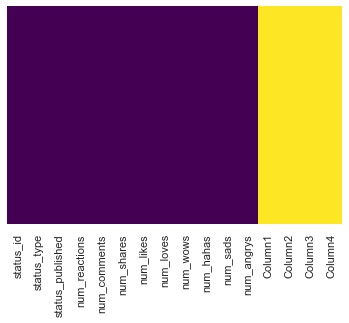

In [2035]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [2036]:
#As we don't have any values in the above column(1,2,3,4), which can be useful in the further analysis
#We are going to drop the NaN_Columns
NaN_Columns=['Column1','Column2','Column3','Column4']
df.drop(NaN_Columns,axis=1,inplace=True)


In [2037]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [2038]:
x=df[df['status_type']=='video']
video=x['num_reactions'].sum()

In [2039]:
total_reactions=df['num_reactions'].sum()
total_reactions

1622326

In [2040]:
video/total_reactions

0.4077343271327711

In [2041]:
x=df[df['status_type']=='photo']
photo=x['num_reactions'].sum()

In [2042]:
photo/total_reactions

0.4791718803742281

In [2043]:
x=df[df['status_type']=='video']
video_comments=x['num_comments'].sum()

In [2044]:
total_comments=df['num_comments'].sum()
total_comments

1581710

In [2045]:
video_comments/total_comments

0.9480524242749935

In [2046]:
x=df[df['status_type']=='video']
video_shares=x['num_shares'].sum()

In [2047]:
total_shares=df['num_shares'].sum()
total_shares

282159

In [2048]:
video_shares/total_shares

0.9568966433819229

In [2049]:
#no of unique columns in the status_id
df['status_id'].nunique()

6997

In [2050]:
#we are trying to locate the duplicate values in the status_id column
df1=df.loc[df['status_id'].duplicated()]
df1

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
1698,246675545449582_326883450762124,photo,10/11/2013 8:23,211,2,0,211,0,0,0,0,0
1729,246675545449582_429583263825475,photo,9/11/2013 0:12,537,16,1,537,0,0,0,0,0
6221,819700534875473_1002372733274918,video,6/10/2018 3:43,376,20,3,354,19,3,0,0,0
6222,819700534875473_1001982519980606,photo,6/9/2018 22:53,255,7,4,249,6,0,0,0,0
6223,819700534875473_1000607730118085,photo,6/7/2018 7:01,1704,21,3,1685,15,2,2,0,0
6224,819700534875473_999880033524188,status,6/6/2018 2:20,205,39,4,197,4,4,0,0,0
6225,819700534875473_998824716963053,photo,6/4/2018 6:57,336,42,2,285,5,0,0,46,0
6226,819700534875473_997075427137982,status,6/1/2018 0:35,111,2,1,110,1,0,0,0,0
6227,819700534875473_995933077252217,photo,5/30/2018 6:33,357,18,9,352,3,1,1,0,0
6228,819700534875473_995839410594917,photo,5/30/2018 2:39,114,7,0,109,3,2,0,0,0


In [2051]:
# Count duplicate on a column
df.status_id.duplicated().sum()


53

In [2052]:
# Count duplicates in a DataFrame
df.duplicated().sum()

51

In [2053]:
# Count the number of non-duplicates
#just to compare if it matches the total no of records
#df.loc[df.duplicated(), :].sort_values(by='status_id',axis=0)
(~df.duplicated()).sum()

6999

In [2054]:
#Dropping duplicate rows
#Note that we started out as 7050 records, now it’s 6999
#We can set the argument inplace=True to remove duplicate values from the original DataFrame.

df.drop_duplicates(inplace=True)

In [2055]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [2056]:
#As we dropped the duplicate records, need to reset the index
df.reset_index(inplace=True)

In [2057]:
df.drop('index',axis=1,inplace=True)


In [2058]:
#changing the datetime format to my local machine format for convenience
df['status_published'] = pd.to_datetime(df.status_published)

In [2059]:
#arranging the table in ascending order to see the intial days of the campaign
df.sort_values('status_published',ascending=True).head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
2634,246675545449582_246677465449390,photo,2012-07-15 02:51:00,15,3,0,15,0,0,0,0,0
2633,246675545449582_246678538782616,photo,2012-07-15 02:58:00,14,7,0,14,0,0,0,0,0
2632,246675545449582_246684432115360,photo,2012-07-15 03:32:00,14,1,0,14,0,0,0,0,0
2631,246675545449582_246686478781822,photo,2012-07-15 03:42:00,12,3,0,12,0,0,0,0,0
2630,246675545449582_246688625448274,photo,2012-07-15 03:54:00,19,17,3,19,0,0,0,0,0


# EDA


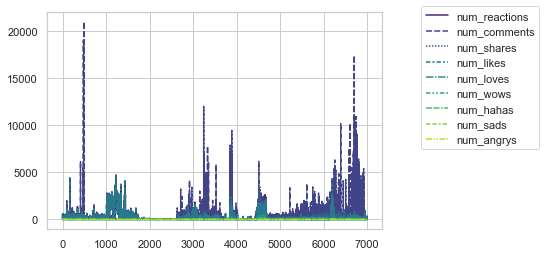

In [2060]:
df1=df[['num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys']]


sns.set(style='whitegrid')
x=sns.lineplot(data=df1,palette='viridis')

x.legend(bbox_to_anchor=(1.1, 1.05))

In [2061]:
df=df.set_index('status_published')
df.head()

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
status_published,,,,,,,,,,,
2018-04-22 06:00:00,246675545449582_1649696485147474,video,529,512,262,432,92,3,1,1,0
2018-04-21 22:45:00,246675545449582_1649426988507757,photo,150,0,0,150,0,0,0,0,0
2018-04-21 06:17:00,246675545449582_1648730588577397,video,227,236,57,204,21,1,1,0,0
2018-04-21 02:29:00,246675545449582_1648576705259452,photo,111,0,0,111,0,0,0,0,0
2018-04-18 03:22:00,246675545449582_1645700502213739,photo,213,0,0,204,9,0,0,0,0


In [2062]:
#from sklearn import preprocessing
#preprocessing.normalize

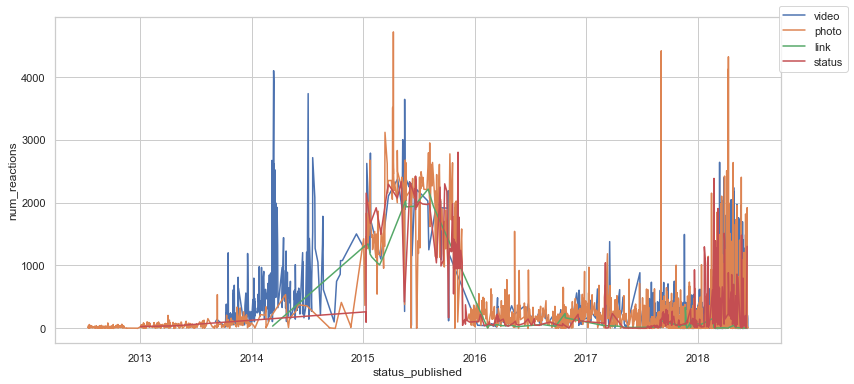

In [2063]:
plt.figure(figsize=(13,6))
x=sns.lineplot(x=df.index, y=df['num_reactions'],hue=df['status_type'])
x.legend(bbox_to_anchor=(1.1, 1.05))

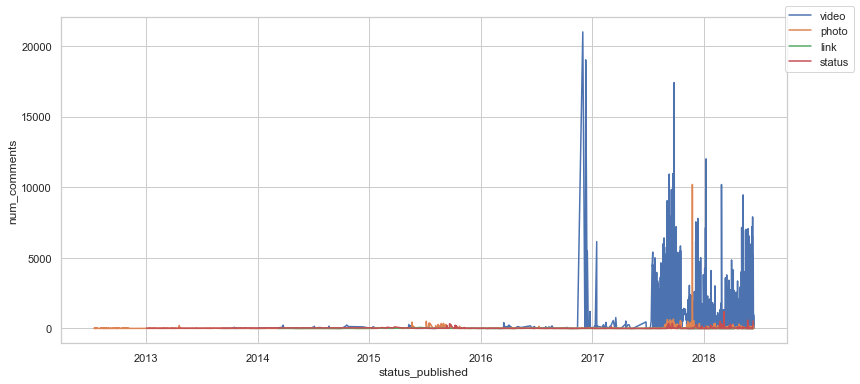

In [2064]:
plt.figure(figsize=(13,6))
x=sns.lineplot(x=df.index, y=df['num_comments'],hue=df['status_type'])
x.legend(bbox_to_anchor=(1.1, 1.05))

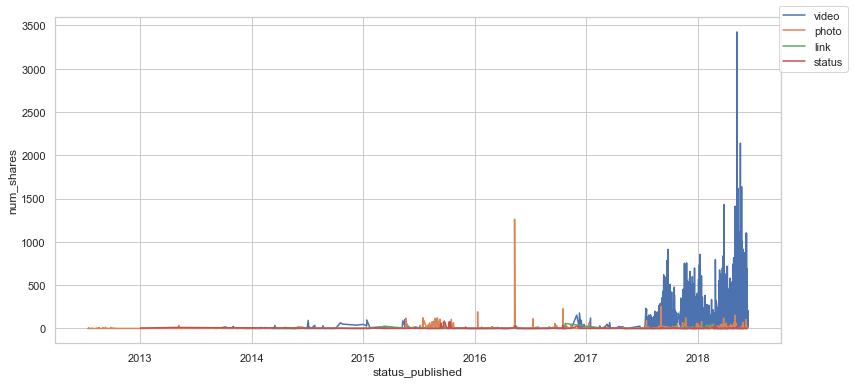

In [2065]:
plt.figure(figsize=(13,6))
x=sns.lineplot(x=df.index, y=df['num_shares'],hue=df['status_type'])
x.legend(bbox_to_anchor=(1.1, 1.05))

<AxesSubplot:>

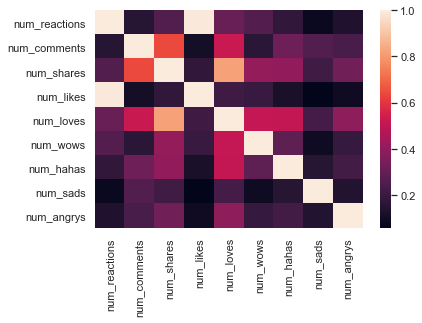

In [2066]:
#checking the correlation between the features
sns.heatmap(df.corr())

<b>
    
- It looks like num_likes and num_reactions and it is because Num_reactions = (num_likes + num_loves + num_wows + num_hahas + num_sads + num_angrys)

    
    
- num_shares and num_loves are highly correlated because when audience love some content they share it with an intent to make others see or feel what they experience(creating awareness, check reaction)
    
<b>

In [2067]:
df.corr()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
num_reactions,1.000000,0.156190,0.259640,0.994672,0.310645,0.261694,0.179657,0.082094,0.136064
num_comments,0.156190,1.000000,0.640536,0.105934,0.521320,0.163506,0.325064,0.257545,0.239557
num_shares,0.259640,0.640536,1.000000,0.179664,0.820284,0.409803,0.399864,0.218628,0.332355
num_likes,0.994672,0.105934,0.179664,1.000000,0.212715,0.200015,0.123129,0.057110,0.096276
num_loves,0.310645,0.521320,0.820284,0.212715,1.000000,0.510148,0.507899,0.226574,0.394818
num_wows,0.261694,0.163506,0.409803,0.200015,0.510148,1.000000,0.288468,0.091425,0.191672
num_hahas,0.179657,0.325064,0.399864,0.123129,0.507899,0.288468,1.000000,0.154035,0.225083
num_sads,0.082094,0.257545,0.218628,0.057110,0.226574,0.091425,0.154035,1.000000,0.143711
num_angrys,0.136064,0.239557,0.332355,0.096276,0.394818,0.191672,0.225083,0.143711,1.000000


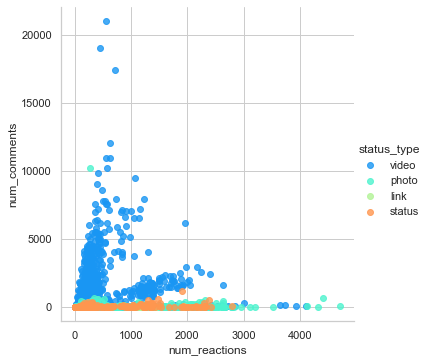

In [2068]:
sns.lmplot(x='num_reactions',y='num_comments',data=df,fit_reg=False,hue='status_type',palette='rainbow')

In [2069]:
#checking the correlation between the features based on status type
video=df[df['status_type']=='video']
photo=df[df['status_type']=='photo']
link=df[df['status_type']=='link']
status=df[df['status_type']=='status']
video.corr()




,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
num_reactions,1.000000,0.214952,0.398910,0.987204,0.491064,0.359210,0.298494,0.202372,0.363113
num_comments,0.214952,1.000000,0.598816,0.150795,0.455526,0.139397,0.320254,0.425644,0.341799
num_shares,0.398910,0.598816,1.000000,0.286442,0.795300,0.419974,0.403553,0.338195,0.505006
num_likes,0.987204,0.150795,0.286442,1.000000,0.348820,0.267205,0.213671,0.151081,0.280119
num_loves,0.491064,0.455526,0.795300,0.348820,1.000000,0.523279,0.534958,0.356986,0.617738
num_wows,0.359210,0.139397,0.419974,0.267205,0.523279,1.000000,0.305582,0.141851,0.282773
num_hahas,0.298494,0.320254,0.403553,0.213671,0.534958,0.305582,1.000000,0.264400,0.338555
num_sads,0.202372,0.425644,0.338195,0.151081,0.356986,0.141851,0.264400,1.000000,0.281298
num_angrys,0.363113,0.341799,0.505006,0.280119,0.617738,0.282773,0.338555,0.281298,1.000000


In [2070]:
photo.corr()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
num_reactions,1.000000,0.084919,0.165997,0.999886,0.303883,0.297789,0.046131,0.016056,0.001032
num_comments,0.084919,1.000000,0.073554,0.083735,0.078872,0.132097,0.022068,-0.000329,0.003488
num_shares,0.165997,0.073554,1.000000,0.164140,0.149985,0.101758,0.070537,0.072443,-0.001843
num_likes,0.999886,0.083735,0.164140,1.000000,0.291767,0.288049,0.038971,0.011706,-0.001438
num_loves,0.303883,0.078872,0.149985,0.291767,1.000000,0.513427,0.133292,0.065220,-0.012202
num_wows,0.297789,0.132097,0.101758,0.288049,0.513427,1.000000,0.123179,0.022736,0.090757
num_hahas,0.046131,0.022068,0.070537,0.038971,0.133292,0.123179,1.000000,0.010415,0.057681
num_sads,0.016056,-0.000329,0.072443,0.011706,0.065220,0.022736,0.010415,1.000000,0.052921
num_angrys,0.001032,0.003488,-0.001843,-0.001438,-0.012202,0.090757,0.057681,0.052921,1.000000


In [2071]:
link.corr()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
num_reactions,1.000000,0.486884,-0.000126,0.999998,-0.211006,-0.076230,-0.058606,NaN,NaN
num_comments,0.486884,1.000000,-0.029654,0.486971,-0.085304,-0.104930,-0.090423,NaN,NaN
num_shares,-0.000126,-0.029654,1.000000,-0.000897,0.375754,0.126255,0.873294,NaN,NaN
num_likes,0.999998,0.486971,-0.000897,1.000000,-0.212563,-0.077968,-0.059446,NaN,NaN
num_loves,-0.211006,-0.085304,0.375754,-0.212563,1.000000,0.429485,0.357051,NaN,NaN
num_wows,-0.076230,-0.104930,0.126255,-0.077968,0.429485,1.000000,0.180139,NaN,NaN
num_hahas,-0.058606,-0.090423,0.873294,-0.059446,0.357051,0.180139,1.000000,NaN,NaN
num_sads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_angrys,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2072]:
status.corr()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
num_reactions,1.000000,0.312431,0.241476,0.999923,0.117730,0.281545,-0.072987,-0.077218,-0.025149
num_comments,0.312431,1.000000,0.339379,0.305767,0.375990,0.628104,0.016315,0.006027,0.003973
num_shares,0.241476,0.339379,1.000000,0.240374,0.147964,0.113428,-0.024025,-0.049909,-0.026224
num_likes,0.999923,0.305767,0.240374,1.000000,0.107782,0.271463,-0.074929,-0.079839,-0.026018
num_loves,0.117730,0.375990,0.147964,0.107782,1.000000,0.437125,0.055132,0.000144,-0.010257
num_wows,0.281545,0.628104,0.113428,0.271463,0.437125,1.000000,0.035919,-0.000580,0.022248
num_hahas,-0.072987,0.016315,-0.024025,-0.074929,0.055132,0.035919,1.000000,0.096643,0.088796
num_sads,-0.077218,0.006027,-0.049909,-0.079839,0.000144,-0.000580,0.096643,1.000000,0.103584
num_angrys,-0.025149,0.003973,-0.026224,-0.026018,-0.010257,0.022248,0.088796,0.103584,1.000000


<b>
Using status_type as an index to group the data. This increases the level of granularity in the resultant table and we can get more specifics with our findings
<b>



In [2073]:
table=pd.pivot_table(data=df,index=['status_type'])
table

,num_angrys,num_comments,num_hahas,num_likes,num_loves,num_reactions,num_sads,num_shares,num_wows
status_type,,,,,,,,,
link,0.000000,5.698413,0.031746,369.619048,0.301587,370.142857,0.000000,4.396825,0.190476
photo,0.039821,15.475495,0.186852,170.002356,1.354383,172.330820,0.126296,2.491517,0.618049
status,0.025070,36.428969,0.111421,439.545961,1.529248,442.740947,0.350975,2.576602,1.178273
video,0.254179,642.744964,1.735962,242.967853,35.547364,283.369910,0.414059,115.728247,2.447921


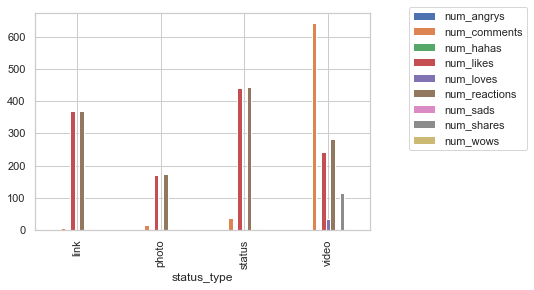

In [2074]:
x=table.plot(kind='bar')
x.legend(bbox_to_anchor=(1.1, 1.05))

<AxesSubplot:xlabel='status_type', ylabel='count'>

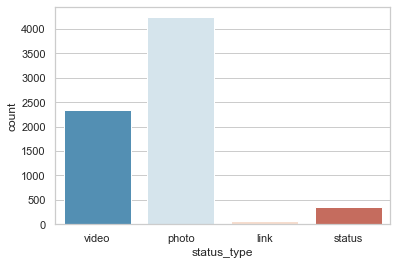

In [2075]:
sns.countplot(x='status_type',data=df,palette='RdBu_r')

In [2076]:
df['status_type'].value_counts()

photo     4244
video     2333
status     359
link        63
Name: status_type, dtype: int64

## Linear Regression Model

Let's now begin to train our regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable. 

### X and y arrays

In [2077]:
df.columns

Index(['status_id', 'status_type', 'num_reactions', 'num_comments',
       'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas',
       'num_sads', 'num_angrys'],
      dtype='object')

<b>
 We will build a linear regression model that will help in forecastin no of reactions for the video status type
<b>

In [2078]:
column=['status_type']
final_df = pd.get_dummies(df,columns=column)
final_df

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
status_published,,,,,,,,,,,,,,
2018-04-22 06:00:00,246675545449582_1649696485147474,529,512,262,432,92,3,1,1,0,0,0,0,1
2018-04-21 22:45:00,246675545449582_1649426988507757,150,0,0,150,0,0,0,0,0,0,1,0,0
2018-04-21 06:17:00,246675545449582_1648730588577397,227,236,57,204,21,1,1,0,0,0,0,0,1
2018-04-21 02:29:00,246675545449582_1648576705259452,111,0,0,111,0,0,0,0,0,0,1,0,0
2018-04-18 03:22:00,246675545449582_1645700502213739,213,0,0,204,9,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-09-24 02:58:00,1050855161656896_1061863470556065,89,0,0,89,0,0,0,0,0,0,1,0,0
2016-09-23 11:19:00,1050855161656896_1061334757275603,16,0,0,14,1,0,1,0,0,0,1,0,0
2016-09-21 23:03:00,1050855161656896_1060126464063099,2,0,0,1,1,0,0,0,0,0,1,0,0


In [2079]:
X=final_df[['status_id','status_type_link','status_type_photo','status_type_status','status_type_video']]
y=final_df['num_reactions']

In [2080]:
from sklearn.model_selection import train_test_split

In [2081]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [2082]:
from sklearn.linear_model import LinearRegression

In [2083]:
lm = LinearRegression()

In [2084]:
lm.fit(X_train,y_train)

LinearRegression()

## Model Evaluation

Evaluating the model by checking out it's coefficients and how we can interpret them.

In [2085]:
print(lm.intercept_)

248.9774729220427


In [2086]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-1.16683812e-29  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00]




## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

In [2087]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

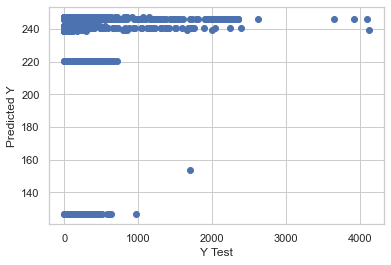

In [2088]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

C:\Users\djpra\Documents\DS\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


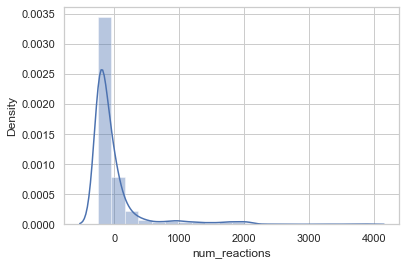

In [2089]:
sns.distplot((y_test-predictions),bins=20);

In [2090]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
status_id,-1.166838e-29
status_type_link,0.000000e+00
status_type_photo,0.000000e+00
status_type_status,0.000000e+00
status_type_video,0.000000e+00


## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

In [2091]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 250.54376705901936
MSE: 190139.9490876338
RMSE: 436.0503974171263


 ## Time series model would an ideal choice for the given dataset. 
 ## Couldn't get time to work on it. Thanks
 

<b>
Description:
    
    
- As per the data, it looks like people are engaging more with the videos.
Though we have more no. of photo posts, people are engaging more with videos and status because the audience usually connects well to content with both visuals and sound effects.
    
- Through thorough tests, we can find out which medium works best for our company and target audience.
    
- As per data, about 40% of the reactions are on video and 47.9% on photos.
People usually take 2-3 seconds to decide whether or not to click on an image ad. In contrast, we have around ten seconds to hook our audience with a video. 
    
- About 94.8% of the comments and 95.68% of the shares are on video. It might be because we convey more information in videos that our consumers can easily understand.
    
- Also, people are reacting more to status compared to photo posts. To get a deeper picture, we need to know how many photo posts had text-only vs with links. Because there is a higher chance that for photo posts with links users needs to go to the landing page to see the content for which people are not interested
    
- We can confirm further by seeing num_loves and num_shares, we have these metrics only for video and for other status types these metrics are negligible.
    
- num_shares and num_loves are highly correlated because when audience love some content they share it with an intent to make others see or feel what they experience(creating awareness, check reaction)
    
- We need to further improve our content for more engagement.
    
- We would like to increase the no of share so that we can reach more audience
    
- num_reactions and num_likes are highly correlated because num_reactions is the sum of num_likes, num_loves, num_wows, num_hahas, num_sads, and num_angrys.

    
    
Additional data required:
    
- Demographics
- Gender
- Age factor
- Content-type
- No of visitors exposed to the post to calculate the conversion
- Average time spent on social media, time spent can give an idea who gave reaction vs who not. Because people spending more time, tend to give a like vs the other. 
- Also, we need the comments to do sentiment analysis using NLP so that we can come up with more relevant content.



<b>